# NLP(natural language processing)-자연어처리
### 자연어: 우리가 일상속에서 쓰는 언어
### 컴퓨터가 자연어를 분석하여 처리하는 과정
### ex) 텍스트분류, 감성분석, 문서요약, 번역, 질의응답

# 1. 자연어처리과정
## 문장이 들어오면
#
## 1. lexical analysis(어휘분석): 각 단어가 무슨 품사인지(noun, verb등)
### -형태소분석(의미를 가지는 가장 작은 단위)+품사태깅(같은 단어여도 의미가 다를경우 중의성 해결위해 부가적 정보 부착)
#
## 2. syntactic analysis(구분분석): 각 단어가 어떤 단어와 관계를 맺는지 트리형로
### -구구조 구문 분석(문법적인 구조를 분석)+의존구문분석(단어간의 의존관계를 분석)
#
## 3. semantic analysis(의미분석): 처리된 데이터를 토대로 의미분석+해석+더 나아가 예측
### -단어 의미 중의성 해소+의미역 분석(서술어가 수식하는 대상을 파악하고 의미를 분석)
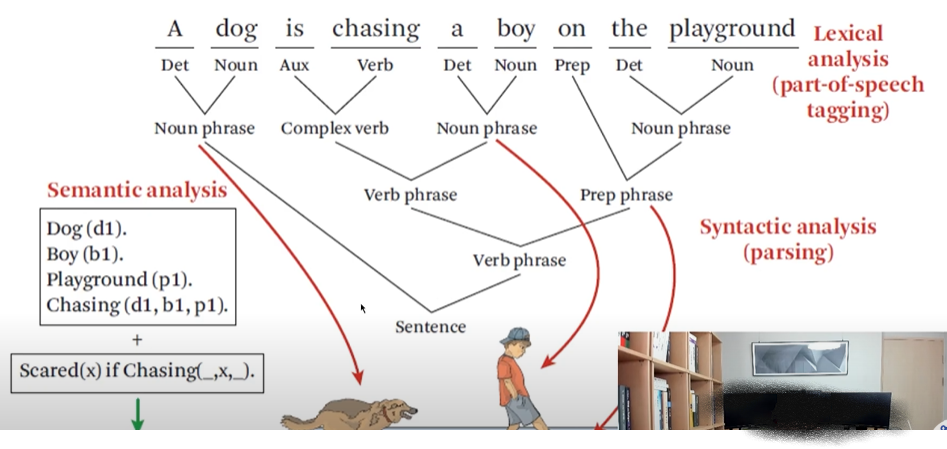

In [7]:
!pip install konlpy

In [10]:
from konlpy.tag import Mecab

In [2]:
from konlpy.tag import Kkma, Hannanum, Komoran, Twitter, Okt, Mecab

In [3]:
#각각의 객체 만듬
kkma=Kkma()
okt=Okt()
komoran=Komoran()
hannanum=Hannanum()
twitter=Twitter()

C:\anaconda3\Lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


---
---
---

# 2. 토큰화(tokenization)
## : 텍스트를 더 작은 단위인 토큰(단어, 구두점, 숫자)으로 분활하는 과정
### 주의점-특수문자(의미를 가질수도있는) 처리나 특정 단어(united kingdom)토큰화에 주의가 필요


# 2-1. 단어 토큰화(두가지 방법)
## .split이나 nlkt사용

In [5]:
#그냥 split 내장 함수 사용
sentence='time is gold'
tokens=sentence.split(' ')
tokens

['time', 'is', 'gold']

In [48]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\kkangwook\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [6]:
# nltk의 tokenize모듈 사용: word_tokenize()
import nltk
nltk.download('punkt_tab')   #쓰일 패키지 다운

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kkangwook\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [6]:
from nltk.tokenize import word_tokenize
tokens=word_tokenize(sentence)
tokens

['time', 'is', 'gold']

## 한국어 토큰화
## 한국어는 공백으로 분리해도 조사(은/는), 접속사(그리고, 하지만)등이 남아 분석에 어려움
## 이를 위해 pos()함수 사용

In [11]:
sentence= '언제나 현재에 집중할 수 있다면 행복할것이다'
#위의 만들어준 konlpy객체에 .pos함수 사용, 여러 모델 종류들 사용 가능->태깅 결과들 같이 나옴
print('Kkma 형태소 분석:', kkma.pos(sentence))
print('Hannanum 형태소 분석:', hannanum.pos(sentence))
print('Komoran 형태소 분석:', komoran.pos(sentence))
print('Twitter 형태소 분석:', twitter.pos(sentence))
print('Okt 형태소 분석:', okt.pos(sentence))

Kkma 형태소 분석: [('언제나', 'MAG'), ('현재', 'NNG'), ('에', 'JKM'), ('집중', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETD'), ('수', 'NNB'), ('있', 'VA'), ('다면', 'ECE'), ('행복', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETD'), ('것', 'NNB'), ('이', 'VCP'), ('다', 'EFN')]
Hannanum 형태소 분석: [('언제나', 'M'), ('현재', 'N'), ('에', 'J'), ('집중', 'N'), ('하', 'X'), ('ㄹ', 'E'), ('수', 'N'), ('있', 'P'), ('다면', 'E'), ('행복', 'N'), ('하', 'X'), ('ㄹ', 'E'), ('것', 'N'), ('이', 'J'), ('다', 'E')]
Komoran 형태소 분석: [('언제나', 'MAG'), ('현재', 'NNG'), ('에', 'JKB'), ('집중', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETM'), ('수', 'NNB'), ('있', 'VV'), ('다면', 'EC'), ('행복', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETM'), ('것', 'NNB'), ('이', 'VCP'), ('다', 'EC')]
Twitter 형태소 분석: [('언제나', 'Adverb'), ('현재', 'Noun'), ('에', 'Josa'), ('집중', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있다면', 'Adjective'), ('행복할것이다', 'Adjective')]
Okt 형태소 분석: [('언제나', 'Adverb'), ('현재', 'Noun'), ('에', 'Josa'), ('집중', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있다면', 'Adjective'), ('행복할것이다', 'Adjective')]


## 토큰화만 실행 시 morphs()함수 사용

In [12]:
print('Kkma 형태소 분석:', kkma.morphs(sentence))
print('Hannanum 형태소 분석:', hannanum.morphs(sentence))
print('Komoran 형태소 분석:', komoran.morphs(sentence))
print('Twitter 형태소 분석:', twitter.morphs(sentence))
print('Okt 형태소 분석:', okt.morphs(sentence))

Kkma 형태소 분석: ['언제나', '현재', '에', '집중', '하', 'ㄹ', '수', '있', '다면', '행복', '하', 'ㄹ', '것', '이', '다']
Hannanum 형태소 분석: ['언제나', '현재', '에', '집중', '하', 'ㄹ', '수', '있', '다면', '행복', '하', 'ㄹ', '것', '이', '다']
Komoran 형태소 분석: ['언제나', '현재', '에', '집중', '하', 'ㄹ', '수', '있', '다면', '행복', '하', 'ㄹ', '것', '이', '다']
Twitter 형태소 분석: ['언제나', '현재', '에', '집중', '할', '수', '있다면', '행복할것이다']
Okt 형태소 분석: ['언제나', '현재', '에', '집중', '할', '수', '있다면', '행복할것이다']


## 형태소(의미를 가지는 가장 작은 언어 단위)만 사용시 nouns()함수 이용

In [13]:
print('Kkma 형태소 분석:', kkma.nouns(sentence))
print('Hannanum 형태소 분석:', hannanum.nouns(sentence))
print('Komoran 형태소 분석:', komoran.nouns(sentence))
print('Twitter 형태소 분석:', twitter.nouns(sentence))
print('Okt 형태소 분석:', okt.nouns(sentence))

Kkma 형태소 분석: ['현재', '집중', '수', '행복']
Hannanum 형태소 분석: ['현재', '집중', '수', '행복', '것']
Komoran 형태소 분석: ['현재', '집중', '수', '행복', '것']
Twitter 형태소 분석: ['현재', '집중', '수']
Okt 형태소 분석: ['현재', '집중', '수']


# 2-2. 문장 토큰화(sentence tokenization)
## 줄바꿈 문자 ('\n')를 기준으로 문장을 분리

In [8]:
sentences='The world is a beautiful book.\nBut of little use to him who cannot read it.'
print(sentences)
tokens=sentences.split('\n')
tokens

The world is a beautiful book.
But of little use to him who cannot read it.


['The world is a beautiful book.',
 'But of little use to him who cannot read it.']

## nltk에서는 sent_tokenize()함수 사용

In [9]:
from nltk.tokenize import sent_tokenize

tokens=sent_tokenize(sentences)
tokens

['The world is a beautiful book.',
 'But of little use to him who cannot read it.']

## 한글에서는 konlpy중 kkma만 문장분리기능 있음

In [17]:
text='진짜? 내일 뭐하지. 이렇게 애매모호한 문장도? 밥은 먹었어. 나는'
print(kkma.sentences(text))

['진짜? 내일 뭐하지. 이렇게 애매모호한 문장도? 밥은 먹었어.', '나는']


## 하지만 정확하지 않아 kss(korean sentence splite)라이브러리 이용

In [1]:
!pip install kss  #호환되지 않아 에러

  Using cached kss-6.0.4.tar.gz (1.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached emoji-1.2.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached pecab-1.0.8.tar.gz (26.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached jamo-0.4.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached hangul_jamo-1.0.1-py3-none-any.whl.metadata (899 bytes)
  Using cached tossi-0.3.1.tar.gz (11 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Distance-0.1.3.tar.gz (180 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached PyYAML-6.0.tar.gz (124 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wh

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [67 lines of output]
  C:\Users\kkangwook\AppData\Local\Temp\pip-build-env-88flq8lu\overlay\Lib\site-packages\setuptools\dist.py:760: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: MIT License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_license_expression()
  running egg_info
  writing lib\PyYAML.egg-info\PKG-INFO
  writing dependency_links to lib\PyYAML.egg-info\dependency_links.txt
  writing top-level names to lib\PyYAML.egg-info

In [ ]:
import kss
kss.split_sentences(text)   #이 함수 사용

# 2-3. 정규표현식을 이용한 토큰화
## nltk의 RegexpTokenizer사용

In [13]:
from nltk.tokenize import RegexpTokenizer

sentences='Where there\'s a will. there\'s a way'
standard=RegexpTokenizer('\w+')     #안에 정규표현식 넣고 이걸 기준으로 한다->단어만 출력
tokens=standard.tokenize(sentences)   #안에 text넣음
tokens      # 특수문자 '는 제거

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\kkangwook\AppData\Local\Temp\ipykernel_11696\1220694397.py:4: SyntaxWarning: invalid escape sequence '\w'
  standard=RegexpTokenizer('\w+')     #안에 정규표현식 넣고 이걸 기준으로 한다


['Where', 'there', 's', 'a', 'will', 'there', 's', 'a', 'way']

In [16]:
#공백기준으로
standard=RegexpTokenizer('\s+', gaps=True)  #gaps=True에 의해 \s를 가져오게 하는것이 아닌 얘를 기준으로 분리하겠다는 것을 의미
tokens=standard.tokenize(sentences)   
tokens 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\kkangwook\AppData\Local\Temp\ipykernel_11696\3149866300.py:2: SyntaxWarning: invalid escape sequence '\s'
  standard=RegexpTokenizer('\s+', gaps=True)  #gaps=True에 의해 \s를 가져오게 하는것이 아닌 얘를 기준으로 분리하겠다는 것을 의미


['Where', "there's", 'a', 'will.', "there's", 'a', 'way']

## 한글에서도 regexptokenizer가능

In [17]:
sentence='안녕하세요 ㅋㅋ 저는 자연어 처리(natural language procession)를ㄹ!! 배우고 있습니다'

standard= RegexpTokenizer('[가-힣]+')
tokens=standard.tokenize(sentence)
tokens    # ㅋ나 ㄹ도 제거

['안녕하세요', '저는', '자연어', '처리', '를', '배우고', '있습니다']

# 2-4. TextBolb을 이용한 토큰화
## TextBlob.words

In [19]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------------- 624.3/624.3 kB 22.6 MB/s eta 0:00:00


In [20]:
from textblob import TextBlob

eng='Where there\'s a will. where\'s a way '

blob=TextBlob(eng)
blob.words

WordList(['Where', 'there', "'s", 'a', 'will', 'where', "'s", 'a', 'way'])

In [21]:
kor='성공의 비결은 단 한 가지. 잘할 수 있는 일에 광적으로 집중하는 것이다.'

blob=TextBlob(kor)
blob.words

WordList(['성공의', '비결은', '단', '한', '가지', '잘할', '수', '있는', '일에', '광적으로', '집중하는', '것이다'])

# 2-5.텐서플로우-케라스(딥러닝)를 이용한 토큰화

In [23]:
pip install keras


   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 5.3 MB/s eta 0:00:00


In [25]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 3.9/376.0 MB 18.0 MB/s eta 0:00:21
   - -------------------------------------- 10.0/376.0 MB 23.0 MB/s eta 0:00:16
   - -------------------------------------- 16.8/376.0 MB 26.4 MB/s eta 0:00:14
   -- ------------------------------------- 22.8/376.0 MB 26.7 MB/s eta 0:00:14
   --- ------------------------------------ 29.9/376.0 MB 27.9 MB/s eta 0:00:13
   --- ------------------------------------ 35.1/376.0 MB 27.2 MB/s eta 0:00:13
   ---- ----------------------------------- 40.6/376.0 MB 27.2 MB/s eta 0:00:13
   ----- ---------------------------------- 48.0/376.0 MB 28.3 MB/s eta 0:00:12
   ----- ---------------------------------- 51.9/376.0 MB 27.1 MB/s eta 0:00:12
   ------ --------------------------------- 58.7/376.0 MB 27.7 MB/s eta 0:00:12
   ------- -------------------------------- 66.1/376.0 MB 28.1 MB/s eta 0:00:12
   ------- -------------------------------- 72.4/3

In [27]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

text_to_word_sequence(eng)

['where', "there's", 'a', 'will', "where's", 'a', 'way']

In [28]:
text_to_word_sequence(kor)

['성공의', '비결은', '단', '한', '가지', '잘할', '수', '있는', '일에', '광적으로', '집중하는', '것이다']

# 2-6. 이 외에도 여러 기타 토크나이저 존재
- MWETokenizer의 경우 united kingdom이나 republic of korea와 같은 나뉘면 안되는 애들 묶어서 토큰화
- TweetTokenizer는 트위터에서 사용되는 여러 감성 표현과 감정을 다룸

---
---
---

# 3. n-gram추출(기준으로 나눈것을 n개씩 묶음)
## -n개의 어절이나 음절을 연쇄적으로 분류해 그 빈도를 분석
## - n=1,2,3일때 각각 unigram, bigram, trigram이라 부름

In [29]:
from nltk import ngrams

In [34]:
sentence= 'There is no royal road to learning'
bigram=list(ngrams(sentence.split(),2))  #각각의 문장을 split해서 2개씩 묶어줘
print(sentence.split())   #안에 인자로 아무것도 않넣으면 공백 기준으로 나눔
bigram

['There', 'is', 'no', 'royal', 'road', 'to', 'learning']


[('There', 'is'),
 ('is', 'no'),
 ('no', 'royal'),
 ('royal', 'road'),
 ('road', 'to'),
 ('to', 'learning')]

In [35]:
trigram=list(ngrams(sentence.split(),3))  #3으로
trigram

[('There', 'is', 'no'),
 ('is', 'no', 'royal'),
 ('no', 'royal', 'road'),
 ('royal', 'road', 'to'),
 ('road', 'to', 'learning')]

In [37]:
# textblob으로도 가능
blob=TextBlob(sentence)
blob.ngrams(n=2)

[WordList(['There', 'is']),
 WordList(['is', 'no']),
 WordList(['no', 'royal']),
 WordList(['royal', 'road']),
 WordList(['road', 'to']),
 WordList(['to', 'learning'])]

# 4. PoS(parts-of-speech) 태깅
## - pos는 품사(명사,동사,형용사등)를 의미->각 단어의 해당하는 품사를 태깅
- NN:몀사, VBP: 현재동사, IN:전치사 등

In [50]:
sentence= 'Think like man of action and act like man of thought.'

tokens=word_tokenize(sentence)
pos_tag=nltk.pos_tag(tokens)
pos_tag   #어떤 품사들인지 태깅

[('Think', 'VBP'),
 ('like', 'IN'),
 ('man', 'NN'),
 ('of', 'IN'),
 ('action', 'NN'),
 ('and', 'CC'),
 ('act', 'NN'),
 ('like', 'IN'),
 ('man', 'NN'),
 ('of', 'IN'),
 ('thought', 'NN'),
 ('.', '.')]

# 5. 불용어(stopword)제거-분석에 덜필요한 애들 제거
## -불용어: 전치사(on,in), 조사(을/를), 길이가 짧거나 빈도수가 적은 단어
## 완벽하게 제거되지는 않아 사용자가 불용어 사전을 만들어 제거하는것이 좋음

In [52]:
#불용어 사전 정의
stop_words='on in the'   
stop_words=stop_words.split(' ')
stop_words

['on', 'in', 'the']

In [55]:
#내가 직접 불용어 제거
sentence='singer on the stage'.split(' ')  #리스트화
wanted_words=[]
for i in sentence:
    if i not in stop_words:
        wanted_words.append(i)
wanted_words

['singer', 'stage']

### nltk패키지의 이미 만들어진 불용어 리스트 사용

In [56]:
from nltk.corpus import stopwords

nltk.download('stopwords')   #다운 필요

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkangwook\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [57]:
stop_words=stopwords.words('english')  #영어종류의 불용어만 가져오기
len(stop_words)

198

In [61]:
#이를 기준으로 불용어 제거
s='If you do not walk today, you will have to run tommorow'
words=word_tokenize(s)    #토큰화
no_stopwords=[]    #불용어 제거버전
for i in words:
    if i not in stop_words:
        no_stopwords.append(i)
no_stopwords

['If', 'walk', 'today', ',', 'run', 'tommorow']

# 6. 철자 교정(spelling correction): 오타 처리
### autocorrect 라이브러리의 Speller

In [62]:
! pip install autocorrect

     ---------------------------------------- 0.0/622.8 kB ? eta -:--:--
     ------------------------------------- 622.8/622.8 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622375 sha256=8b19e56b2370298e68bfbf3e9c266ded35ff3535ad2f554413d3fbd52ae4e5be
  Stored in directory: c:\users\kkangwook\appdata\local\pip\cache\wheels\b6\28\c2\9ddf8f57f871b55b6fd0ab99c887531fb9a66e5ff236b82aee
Successfully built autocorrect


In [63]:
from autocorrect import Speller
spell=Speller('en')    #영어 수정을 설정
print(spell('poeplle'))
print(spell('peope'))
print(spell('peoplle'))

people
people
people


In [65]:
s=word_tokenize('Earlly biird catchess the womm')

ss=' '.join([spell(s)for s in s])  # 고친걸 리스트에 넣고 .join으로 문장화
ss

'Early bird catches the worm'

# 7. 언어 단수화(singularize)와 복수화(pluralize)
## textblob패키지 사용-but 기준없이 s붙이거나 s땜
## 반면 복수화 시 glass같은 경우 그냥 s만 붙이는게 아니라 es로 붙임 

In [70]:
from textblob import TextBlob

words='apples bananas oranges kiss'
tb=TextBlob(words)

print(tb.words)
print(tb.words.singularize())  #단수화

['apples', 'bananas', 'oranges', 'kiss']
['apple', 'banana', 'orange', 'kis']


In [69]:
words='car train airplane work hi glass'
tb=TextBlob(words)

print(tb.words)
print(tb.words.pluralize())   

['car', 'train', 'airplane', 'work', 'hi', 'glass']
['cars', 'trains', 'airplanes', 'works', 'his', 'glasses']


# 8. 어간(Stemming) 추출
## 어간: 단어의 의미를 가지는 부분으로 변하지 않는 부분
## -ex) 하다->하,   먹다->먹, 예쁘다->예쁘

In [71]:
stemmer=nltk.stem.PorterStemmer()
stemmer.stem('application')

'applic'

In [72]:
print(stemmer.stem('begining'))
print(stemmer.stem('catches'))
print(stemmer.stem('education'))

begin
catch
educ


# 9. 표제어(lemmatization) 추출
## 표제어: 단어의 기본 형태
## ex) runs, ran, running전부 표제어는 run
## ex) cats->cat  (복수형)
## ex) better와 best같은 형용사의 표제어는 good

In [73]:
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kkangwook\AppData\Roaming\nltk_data...


True

In [74]:
lemmatizer=WordNetLemmatizer()  #객체생성

lemmatizer.lemmatize('application')

'application'

In [76]:
print(lemmatizer.lemmatize('beginning'))
print(lemmatizer.lemmatize('catches'))
print(lemmatizer.lemmatize('education'))
print(lemmatizer.lemmatize('best'))

beginning
catch
education
best


# 10. 개체명 인식(Named Entity Recognition)
## ex) 나라명

In [80]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\kkangwook\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\kkangwook\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [78]:
s='Rome was not built in a day'

tags=nltk.pos_tag(word_tokenize(s))
tags

[('Rome', 'NNP'),
 ('was', 'VBD'),
 ('not', 'RB'),
 ('built', 'VBN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('day', 'NN')]

In [81]:
entity=nltk.ne_chunk(tags,binary=True)
entity   #개체명일 경우 NE(named entity)라고 표시됨

ModuleNotFoundError: No module named 'svgling'

Tree('S', [Tree('NE', [('Rome', 'NNP')]), ('was', 'VBD'), ('not', 'RB'), ('built', 'VBN'), ('in', 'IN'), ('a', 'DT'), ('day', 'NN')])

# 11. 의존 구문 분석(dependency parsing)
## spacy라이브러리를 사용
## 각 토큰에 품사, 의존관계, 개체명정보등이 태깅
- token.text: token 문자열
- token.dep_: token과 token의 지배소 간의 의존관계 유형
- token.head: 지배소 token

In [83]:
! pip install spacy

   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ----------------------- ---------------- 6.8/11.8 MB 32.3 MB/s eta 0:00:01
   ---------------------------------------- 11.8/11.8 MB 28.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/632.6 kB ? eta -:--:--
   --------------------------------------- 632.6/632.6 kB 23.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 11.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -------------------------- ------------- 4.2/6.3 MB 22.9 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 17.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.4 MB ? eta -:--:--
   --------------------------------- ------ 4.5/5.4 MB 26.9 MB/s eta 0:00:01
   ---------------------------------------- 5.4/5.4 MB 21.9 MB/s eta 0:00:00


In [87]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------- ----------------------- 5.2/12.8 MB 29.0 MB/s eta 0:00:01
     ------------------------------------ -- 12.1/12.8 MB 30.2 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 27.2 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 19.6 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [89]:
import spacy
from spacy import displacy

nlp=spacy.load('en_core_web_sm')  #english core web에 있는 걸로 load

doc=nlp('I am taking a natural language processing class at university.')
for i in doc:
    print(i.text, i.dep_, i.head.text)

I nsubj taking
am aux taking
taking ROOT taking
a det class
natural amod language
language compound class
processing compound class
class dobj taking
at prep taking
university pobj at
. punct taking


In [90]:
#해석하기 어려우니 그림으로 보여주기
#옵션: 스타일=의존관계, 주피터노트북에서
displacy.render(doc,style='dep', jupyter=True)  

# 12.단어 중의성 해결(lexical ambiguity)
## ex) i saw(보다,톱) bats(방망이, 박쥐)

In [92]:
from nltk.wsd import lesk

s='i saw bats'

print(word_tokenize(s))
print(lesk(word_tokenize(s),'saw'))   #토큰화 하고 지정한 단어에 대해 어떤 의미인지 예측->v.01은 보다, v.02는 톱으로자르다
print(lesk(word_tokenize(s),'bats'))   #라켓으로 보았다

['i', 'saw', 'bats']
Synset('saw.v.01')
Synset('squash_racket.n.01')


# 13. 문법 구조 분석

In [93]:
from nltk import CFG
from nltk.parse import ChartParser

# 간단한 문법 규칙 정의
grammar = CFG.fromstring("""
  S -> NP VP
  VP -> V NP
  V -> "saw"
  NP -> "John" | "Mary"
""")

parser = ChartParser(grammar)
sentence = "John saw Mary".split()
for tree in parser.parse(sentence):
    tree.pretty_print()

      S          
  ____|___        
 |        VP     
 |     ___|___    
 NP   V       NP 
 |    |       |   
John saw     Mary



# 14.단어간 유사도(word similarity)계산

In [94]:
from nltk.corpus import wordnet as wn

nltk.download('wordnet')  # 다운로드 필요

syn1 = wn.synset('dog.n.01')
syn2 = wn.synset('cat.n.01')

print(syn1.wup_similarity(syn2))  # WordNet 유사도->1일수록 유사

0.8571428571428571


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kkangwook\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
